# Künstliche Neuronale Netze
In diesem Notebook wird ein einfaches künstliches Neuronales Netz zur Klassifizierung von handgeschriebenen Zahlen implementiert und demonstriert. Die Deep-Learning Bibliothek [Keras](https://keras.io/) wird genutzt, um für Einstieg in die Programmierung auf einer hohen Abstraktionsebene zu ermöglichen. Keras setzt auf dem bekannten Deep Learning Framework [TensorFlow](https://tensorflow.org) auf.

![MNIST dataset of handwritten digits](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

Der [MNIST-Datensatz](http://yann.lecun.com/exdb/mnist/) ist ein sehr beliebtes Beispiel, um anhand eines einfachen Klassifizierungsproblems Machine Learning Techniken zu demonstrieren. Die 60000 Beispiele dieses Datensatzes sind Bilder von handgeschriebenen Zahlen in der Auflösung 28x28-Pixel und den dazugehörigen beschreibenden Labels (z.B. "2", "9", ...).

## Programmbiblioteken importieren
Neben unterschiedlichen Modulen der Keras-Bibliothek wird `matplotlib` für die Visualisierungen importiert.

In [1]:
import keras
import helper
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


## Datensatz laden
Keras bringt eine [Reihe von Datensätzen](https://keras.io/datasets/) zum Ausprobieren der Bibliothek mit. Mit einem einzigen Funktionsaufruf kann wie folgend der Test- und Trainingsdatensatz in entsprechende Varablen geladen werden.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

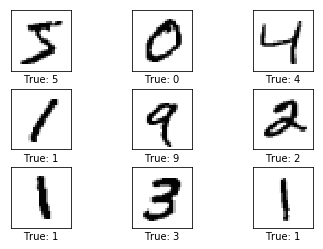

In [3]:
helper.plot_images(x_train[0:9], y_train[0:9])

In [4]:
num_classes = 10

In [5]:
x_train = x_train[0:2000].reshape(-1, 784).astype('float32')
x_test = x_test.reshape(-1, 784).astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Kodieren der Klassenlabels nach dem One-Hot Prinzip
y_train = keras.utils.to_categorical(y_train, num_classes)[0:2000]
y_test = keras.utils.to_categorical(y_test, num_classes)

2000 train samples
10000 test samples


## Modellarchitektur


![Netzarchtektur für MNIST-Klassifizierung](https://3.bp.blogspot.com/-mDyzBzA4btg/V4_Z0f2mc7I/AAAAAAAAE3M/dtU8hT661fQWtnRC_JvIH_4qifQomZ4PACLcB/s1600/MNIST_neuralnet_image.png)

In [6]:
model = Sequential([
    Dense(100, input_shape=(784,)),
    Activation('sigmoid'),
    Dense(10),
    Activation('softmax'),
])

In [7]:
# Gegebenenfalls bereits vorhandene Gewichte löschen.
model.reset_states()

# Optimizer und Loss festlegen und das Modell kompilieren.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Modell trainineren

In [8]:
# Train the model, iterating on the data in batches of 32 samples
training_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 382us/step - loss: 1.5359 - acc: 0.6685 - val_loss: 1.1266 - val_acc: 0.7699
Epoch 2/10
2000/2000 [==============================] - 1s 335us/step - loss: 0.8907 - acc: 0.8190 - val_loss: 0.7727 - val_acc: 0.8329
Epoch 3/10
2000/2000 [==============================] - 1s 257us/step - loss: 0.6385 - acc: 0.8635 - val_loss: 0.6205 - val_acc: 0.8523
Epoch 4/10
2000/2000 [==============================] - 1s 285us/step - loss: 0.5097 - acc: 0.8835 - val_loss: 0.5247 - val_acc: 0.8676
Epoch 5/10
2000/2000 [==============================] - 1s 368us/step - loss: 0.4278 - acc: 0.8975 - val_loss: 0.4654 - val_acc: 0.8805
Epoch 6/10
2000/2000 [==============================] - 1s 396us/step - loss: 0.3711 - acc: 0.9110 - val_loss: 0.4442 - val_acc: 0.8801
Epoch 7/10
2000/2000 [==============================] - 1s 409us/step - loss: 0.3304 - acc: 0.9195 - val_loss: 0.4101 - val_acc: 0.8865

## Modell evaluieren
Es kann hilfreich sein, die Entwicklung der Fehlermetriken über den Trainingsverlauf zu beobachten. Während die Fehlermetrik `loss` den Durchschnittlichen Fehler während des Trainings auf dem Trainingsdatensatz beschreibt, wird der sogenannte _Validation-Loss_ nach jedem Interation durch den Datensatz (_Epoch_) berechnet: `val_loss` ist der Fehler auf einer Teilmenge des Test-Datensatzes. Konvergiert die Auswertung der Trainings-Lossfunktion gegen 0, ist die gesuchte Funktion für die gewählte Netzarchitektur lernbar. Auch die Entwicklung des Validation-Loss ist wichtig.

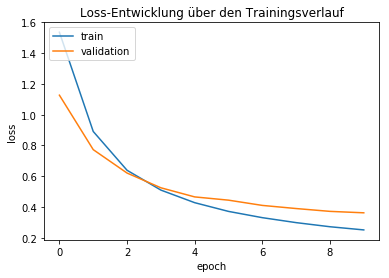

In [9]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss-Entwicklung über den Trainingsverlauf')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 45us/step


[0.3619924486875534, 0.8951]

### Aufgabe
* Was könnte passieren, wenn der Parameter `batch_size` zu klein bzw. zu groß gewählt ist?
* Welches Problem könnte vorliegen, wenn in obiger Abbildung die blaue Kurve des Trainings Loss-Verlaufs gegen 0 konvergiert, die orange Validation-Loss Kurve aber nach vielen viele Datensatz-Iterationen (`epochs`) nach oben ausschlägt?

## Weiterführende Links

[TensorFlow Playground](https://playground.tensorflow.org/) ist eine Browserbasierte Simulation eines künstlichen neuronalen Netzes. Es können verschiedene Datensätze ausgewählt, die Modellarchitektur angepasst und der Trainingsprozess überwacht werden.